In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from IPython.display import display

In [105]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [106]:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ","_")
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [107]:
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [108]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = data[col].str.lower().str.replace(" ","_")
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [110]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [111]:
data["totalcharges"] = pd.to_numeric(data["totalcharges"], errors="coerce")

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [113]:
data.dropna(inplace=True)

In [114]:
data["seniorcitizen"] = data["seniorcitizen"].astype("object")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   object 
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null   object 
 17  

In [115]:
data.describe()

,tenure,monthlycharges,totalcharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Axes: xlabel='churn', ylabel='tenure'>

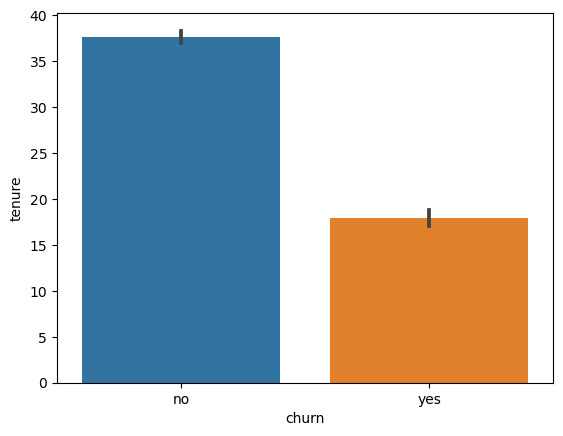

In [116]:
sns.barplot(x = data["churn"],y = data["tenure"])

<Axes: xlabel='churn', ylabel='monthlycharges'>

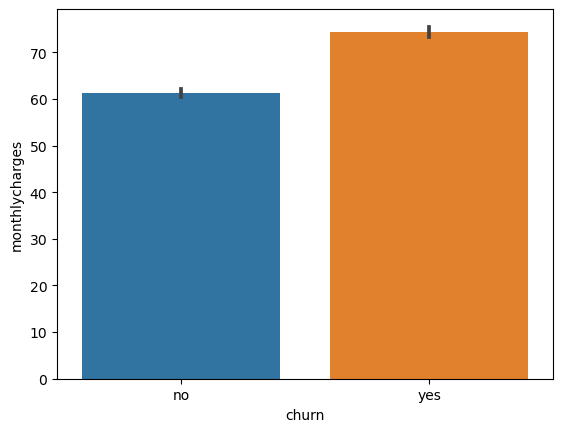

In [117]:
sns.barplot(x = data["churn"],y = data["monthlycharges"])

<Axes: xlabel='churn', ylabel='totalcharges'>

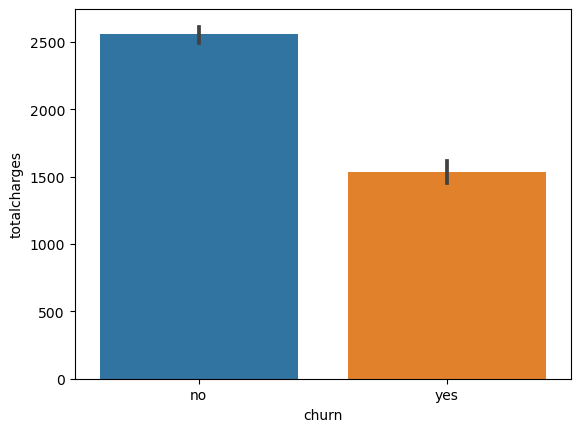

In [118]:
sns.barplot(x = data["churn"],y = data["totalcharges"])

In [119]:
data["churn"] = (data["churn"] == "yes").astype("int32")

<Axes: >

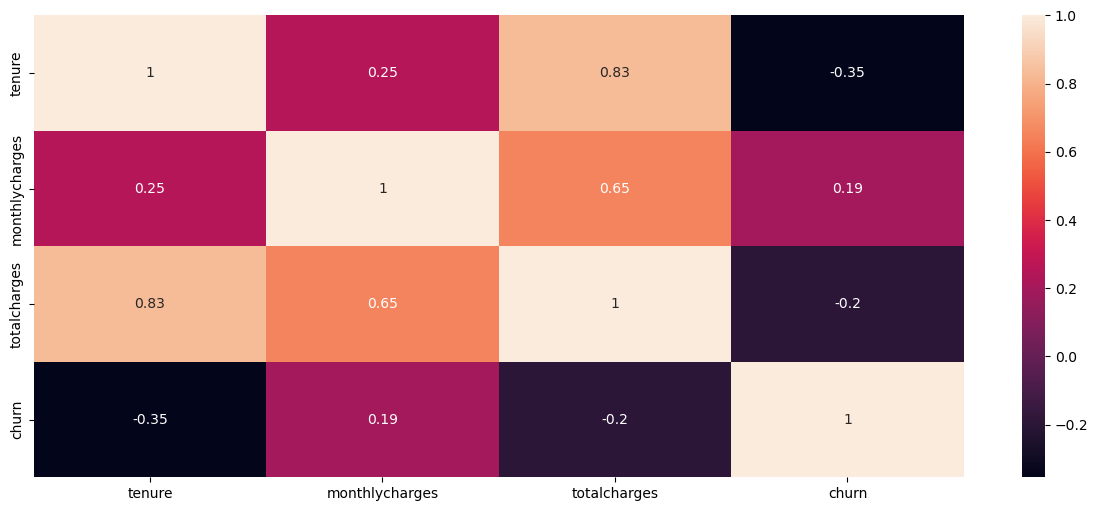

In [120]:
plt.figure(figsize=((15,6)))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [121]:
data.drop("totalcharges", axis=1, inplace=True)

In [122]:
data["churn"].value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

In [123]:
total_mean = data["churn"].mean()
total_mean

0.26578498293515357

In [124]:
males = data[data["gender"] == "male"]
males["churn"].mean()

0.26204564666103125

In [125]:
females = data[data["gender"]== "female"]
females["churn"].mean()

0.2695951765719208

In [126]:
data.describe(include="object")

,customerid,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-vhveg,male,0,no,no,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check
freq,1,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [127]:
senior_0 = data[data["seniorcitizen"] == 0]
senior_0["churn"].mean()

0.2365025466893039

In [128]:
senior_1 = data[data["seniorcitizen"] == 1]
senior_1.churn.mean()

0.4168126094570928

In [129]:
data.groupby("gender")["churn"].agg("mean")

gender
female    0.269595
male      0.262046
Name: churn, dtype: float64

In [130]:
categorical = data.select_dtypes("object").columns.drop("customerid")
categorical

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')

In [131]:
total_mean

0.26578498293515357

In [132]:
for col in categorical:
    groups = pd.DataFrame(data.groupby(col).churn.agg("mean"))
    display(groups)

,churn
gender,
female,0.269595
male,0.262046


,churn
seniorcitizen,
0,0.236503
1,0.416813


,churn
partner,
no,0.329761
yes,0.197171


,churn
dependents,
no,0.312791
yes,0.155312


,churn
phoneservice,
no,0.250000
yes,0.267475


,churn
multiplelines,
no,0.250812
no_phone_service,0.250000
yes,0.286485


,churn
internetservice,
dsl,0.189983
fiber_optic,0.418928
no,0.074342


,churn
onlinesecurity,
no,0.417787
no_internet_service,0.074342
yes,0.146402


,churn
onlinebackup,
no,0.399417
no_internet_service,0.074342
yes,0.215670


,churn
deviceprotection,
no,0.391403
no_internet_service,0.074342
yes,0.225393


,churn
techsupport,
no,0.416475
no_internet_service,0.074342
yes,0.151961


,churn
streamingtv,
no,0.335351
no_internet_service,0.074342
yes,0.301147


,churn
streamingmovies,
no,0.337289
no_internet_service,0.074342
yes,0.299524


,churn
contract,
month-to-month,0.427097
one_year,0.112772
two_year,0.028487


,churn
paperlessbilling,
no,0.163757
yes,0.335893


,churn
paymentmethod,
bank_transfer_(automatic),0.167315
credit_card_(automatic),0.152531
electronic_check,0.452854
mailed_check,0.192020


In [133]:
data.drop(["gender","phoneservice","multiplelines","customerid"], axis=1, inplace=True)

In [134]:
data

,seniorcitizen,partner,dependents,tenure,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,churn
0,0,yes,no,1,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,0
1,0,no,no,34,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,0
2,0,no,no,2,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,1
3,0,no,no,45,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,0
4,0,no,no,2,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,yes,yes,24,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,0
7039,0,yes,yes,72,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,0
7040,0,yes,yes,11,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check,29.60,0
7041,1,yes,no,4,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check,74.40,1


In [136]:
categorical = data.select_dtypes("object").columns
data = pd.get_dummies(data, columns=categorical)
data

,tenure,monthlycharges,churn,seniorcitizen_0,seniorcitizen_1,partner_no,partner_yes,dependents_no,dependents_yes,internetservice_dsl,...,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year,paperlessbilling_no,paperlessbilling_yes,paymentmethod_bank_transfer_(automatic),paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,1,29.85,0,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,34,56.95,0,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,53.85,1,True,False,True,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,45,42.30,0,True,False,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,2,70.70,1,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,True,False,False,True,False,True,True,...,True,False,True,False,False,True,False,False,False,True
7039,72,103.20,0,True,False,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,11,29.60,0,True,False,False,True,False,True,True,...,False,True,False,False,False,True,False,False,True,False
7041,4,74.40,1,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [138]:
X = data.drop("churn", axis=1)
y = data["churn"]

In [141]:
model = LogisticRegression(max_iter=1000,solver="saga")
model.fit(X,y)
model.score(X,y)

c:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8036120591581343

In [143]:
model.predict_proba(X)

array([[0.47300728, 0.52699272],
       [0.94034941, 0.05965059],
       [0.68621632, 0.31378368],
       ...,
       [0.65645702, 0.34354298],
       [0.32924192, 0.67075808],
       [0.94961012, 0.05038988]])

In [152]:
y_predicted = model.predict_proba(X)[:, 1]
y_predicted = (y_predicted >= .8).astype("int32")
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
model.predict(X)

array([1, 0, 0, ..., 0, 1, 0])